In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp

In [2]:
predkosci = (7, 7.5, 8, 8.5 , 9, 10)

In [3]:
d = 2*0.10365 # srednica inletu
przekroj = (np.pi*d)*0.005 #pole inletu
omega = 300.5 #rad/s

In [4]:
dfs = {}
for u in predkosci:
    ID = int(10*u)
    dfs['F{}'.format(ID)] =  pd.read_csv('./{}/forces/0/silynice'.format(ID),
                            sep='\t',
                            skiprows=3,
                            names = ['czas',
                                    'fpx', 'fpy', 'fpz',
                                    'fvx', 'fvy', 'fvz',
                                    'frx', 'fry', 'frz',
                                    'mpx', 'mpy', 'mpz',
                                    'mvx', 'mvy', 'mvz',
                                    'mrx', 'mry', 'mrz']).drop(columns=['fpz', 'fvz', 'frz', 'mvz', 'mrz', 'frx', 'fry', 'mrx', 'mry'])
    dfs['p{}'.format(ID)] = pd.read_csv('./{}/p/0/pnice'.format(ID),
                                   sep = '\t',
                                   skiprows=4,
                                   names = ['czas', 'p'])
    dfs['p{}'.format(ID)].sort_values(by='czas', inplace=True)
    dfs['p{}'.format(ID)].reset_index(drop=True, inplace =True)
dfs

{'F70':          czas         fpx         fpy       fvx       fvy       mpx       mpy  \
 0     0.00001  785.129600 -110.464200  0.019185  0.002563  0.276160  1.962824   
 1     0.00002    1.105095   -1.368950  0.021640  0.000437  0.003422  0.002763   
 2     0.00003    1.221418   -3.138087  0.020976  0.000616  0.007845  0.003054   
 3     0.00004    1.154984   -3.834877  0.020279  0.000743  0.009587  0.002887   
 4     0.00005    1.134817   -4.430021  0.019647  0.000902  0.011075  0.002837   
 5     0.00006    1.203616   -4.975255  0.019044  0.001045  0.012438  0.003009   
 6     0.00007    1.243272   -5.805033  0.018492  0.001190  0.014513  0.003108   
 7     0.00008    1.117710   -5.978375  0.017955  0.001317  0.014946  0.002794   
 8     0.00009    1.041483   -6.594907  0.017463  0.001422  0.016487  0.002604   
 9     0.00010    1.133710   -7.016716  0.016914  0.001479  0.017542  0.002834   
 10    0.00011    1.095687   -7.835993  0.016388  0.001517  0.019590  0.002739   
 11    0.

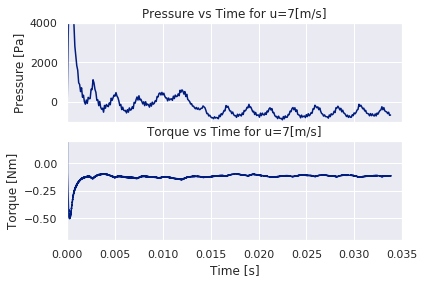

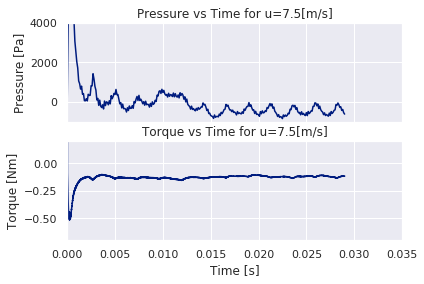

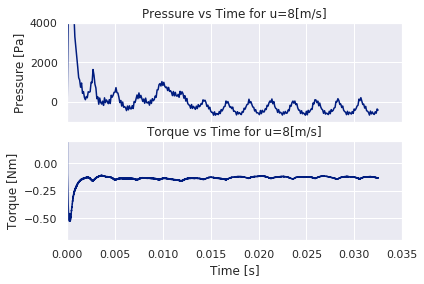

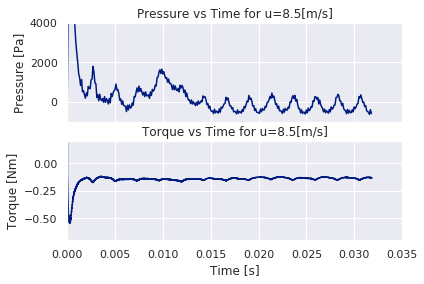

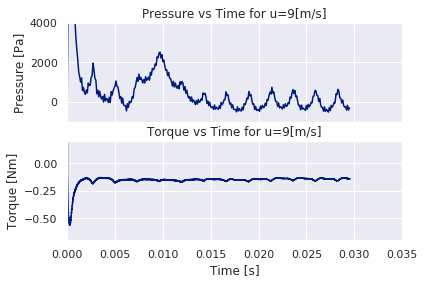

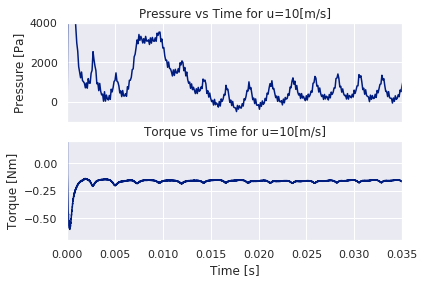

In [5]:
sns.set()
sns.set_style('darkgrid')
sns.set_palette('dark')
for u in predkosci:
    ID = int(10*u)
    f, axes = plt.subplots(2, 1, sharex=True)
    sns.lineplot(x = dfs['p{}'.format(ID)]['czas'],
                     y = dfs['p{}'.format(ID)]['p'], ax = axes[0]).set_title('Pressure vs Time for u={}[m/s]'.format(u))
    sns.lineplot(x = dfs['F{}'.format(ID)]['czas'],
                     y = dfs['F{}'.format(ID)]['mpz'], ax = axes[1]).set_title('Torque vs Time for u={}[m/s]'.format(u))
    
    axes[0].set_xlim(0, 0.035)
    axes[1].set_xlim(0, 0.035)
    axes[0].set_ylim(-1000, 4000)
    axes[1].set_ylim(-0.7, 0.2)
    axes[0].set_xlabel('Time [s]')
    axes[1].set_xlabel('Time [s]')
    axes[0].set_ylabel('Pressure [Pa]')
    axes[1].set_ylabel('Torque [Nm]')
    f.savefig('pressureAndTorque{}.svg'.format(ID))
    f.savefig('pressureAndTorque{}.pdf'.format(ID))


In [6]:
dfssteady = {}
results = pd.DataFrame(columns = ['u', 'avgM', 'avgp', 'eta'])
for u in predkosci:
    i=0
    ID= int(10*u)
    dataframezmomentem = 'F{}'.format(ID)
    dataframezcisnieniem = 'p{}'.format(ID)
    dfssteady['Fsteady{}'.format(ID)] = dfs[dataframezmomentem].query('0.02 <= czas <= 0.027')
    dfssteady['psteady{}'.format(ID)] = dfs[dataframezcisnieniem].query('0.02 <= czas <= 0.027')
    
    M = (dfssteady['Fsteady{}'.format(ID)]['mpz'].mean())
    p = (dfssteady['psteady{}'.format(ID)]['p'].mean())
    eta = np.abs((przekroj*u*p)/(M*omega))
    results = results.append({'u': u, 'avgM': M, 'avgp': p, 'eta' : eta}, ignore_index=True)

In [7]:

results = results.append({'u': 9.5, 'avgM': -0.153463, 'avgp': 84.341268, 'eta' : np.abs((przekroj*9.5*84.341268)/(-0.153463*omega))}, ignore_index=True)
results

u      avgM        avgp       eta
0   7.0 -0.113488 -585.981089  0.391657
1   7.5 -0.119269 -469.696222  0.320057
2   8.0 -0.124979 -335.360952  0.232617
3   8.5 -0.133525 -196.448274  0.135513
4   9.0 -0.141527  -19.630721  0.013527
5  10.0 -0.163020  404.721337  0.269023
6   9.5 -0.153463   84.341268  0.056576

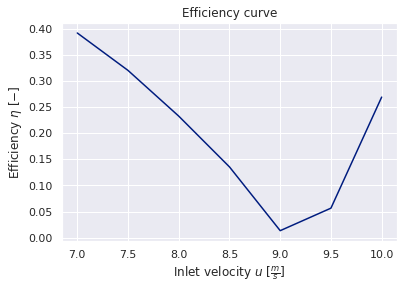

In [8]:
f, ax = plt.subplots(1, 1)
f = sns.lineplot(x = results['u'],
                 y = results['eta']).set_title('Efficiency curve')

ax.set_xlabel('Inlet velocity $u$ $[\\frac{m}{s}]$')
ax.set_ylabel('Efficiency $\eta$ $[-]$')
f.figure.savefig('Efficiencies.svg')
f.figure.savefig('Efficiencies.pdf')

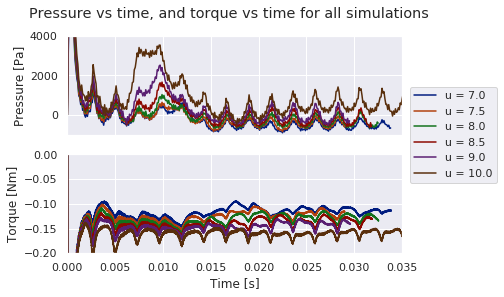

In [32]:

f, axes = plt.subplots(2, 1, sharex=True, figsize=(6, 4))

for u in predkosci:
    ID = int(10*u)
    
    sns.lineplot(x = dfs['p{}'.format(ID)]['czas'],
                     y = dfs['p{}'.format(ID)]['p'], ax = axes[0], label = 'u = {}'.format(ID/10))
    sns.lineplot(x = dfs['F{}'.format(ID)]['czas'],
                     y = dfs['F{}'.format(ID)]['mpz'], ax = axes[1])

axes[0].set_xlim(0, 0.035)
axes[1].set_xlim(0, 0.035)
axes[0].set_ylim(-1000, 4000)
axes[1].set_ylim(-0.2, 0)
axes[0].set_xlabel('Time [s]')
axes[1].set_xlabel('Time [s]')
axes[0].set_ylabel('Pressure [Pa]')
axes[1].set_ylabel('Torque [Nm]')
f.suptitle('Pressure vs time, and torque vs time for all simulations')
axes[0].legend(loc='center right', bbox_to_anchor=(1.3, 0), ncol=1)
f.savefig('pressureAndTorqueall.svg')
f.savefig('pressureAndTorqueall.pdf', bbox_inches = 'tight')